In [3]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def load_csv(filepath):
    data = []
    with open(filepath) as csvfile:
        reader = csv.DictReader(csvfile, delimiter = ",")
        for row in reader:
            data.append(dict(row))
        return data

In [5]:
data = load_csv("data/businesses.csv")
#data[0]

In [6]:
column_data_types = {
    "bid": "integer",
    "location_x": "float",
    "location_y": "float",
    "num_reviews": "integer"
}
column_defs = {
    "location_x": "float",
    "location_y": "float"
}

In [7]:
def convert_data_types(data, column_data_types):
    result = []
    for row in data:
        new_values = {}
        for name, value in row.items():
            if name in column_data_types and column_data_types[name] == "float":
                new_values[name] = float(value)
            elif name in column_data_types and column_data_types[name] == "integer":
                new_values[name] = int(value)
            else:
                new_values[name] = value
        result.append(new_values)
        
    return result
    
def select_column(data, column_defs):
    result = []
    for row in data:
        filtered_values = {}
        for name, value in row.items():
            if name in column_defs:
                filtered_values[name] = value
        result.append(filtered_values)
    
    return result

In [8]:
#convert_data_types(data[0:2], column_data_types)
#select_column(data, column_data_types)

In [9]:
#selected_data = select_column(data, column_defs)
#d = convert_data_types(selected_data, column_defs)
#d[0:2]

In [10]:
class Data:
    def __init__(self, data, column_data_types):
        self.data = data
        self.column_data_types = column_data_types
        
    def convert_data_types(self, data, column_defs):
        result = []
        for row in data:
            new_values = {}
            for name, value in row.items():
                if name in column_defs and column_defs[name] == "float":
                    new_values[name] = float(value)
                elif name in column_defs and column_defs[name] == "integer":
                    new_values[name] = int(value)
                else:
                    new_values[name] = value
            result.append(new_values)
        
        return result
    
    def select_column(self, data, column_defs):
        result = []
        for row in data:
            filtered_values = {}
            for name, value in row.items():
                if name in column_defs:
                    filtered_values[name] = value
            result.append(filtered_values)
    
        return result
    
    def kmeans_data(self):
        column_defs = {"location_x": "float", "location_y": "float"}
        selected_data = self.select_column(self.data, column_defs)
        return self.convert_data_types(selected_data, column_defs)
    
    def kmeans_data_for_viz(self):
        data = self.kmeans_data()
        x_vals = [r["location_x"] for r in data]
        y_vals = [r["location_y"] for r in data]
        
        return x_vals, y_vals

In [11]:
def scatter_plot(x_vals, y_vals, colors=None):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_vals, y_vals, c=colors)
    ax.grid(True)
    return fig

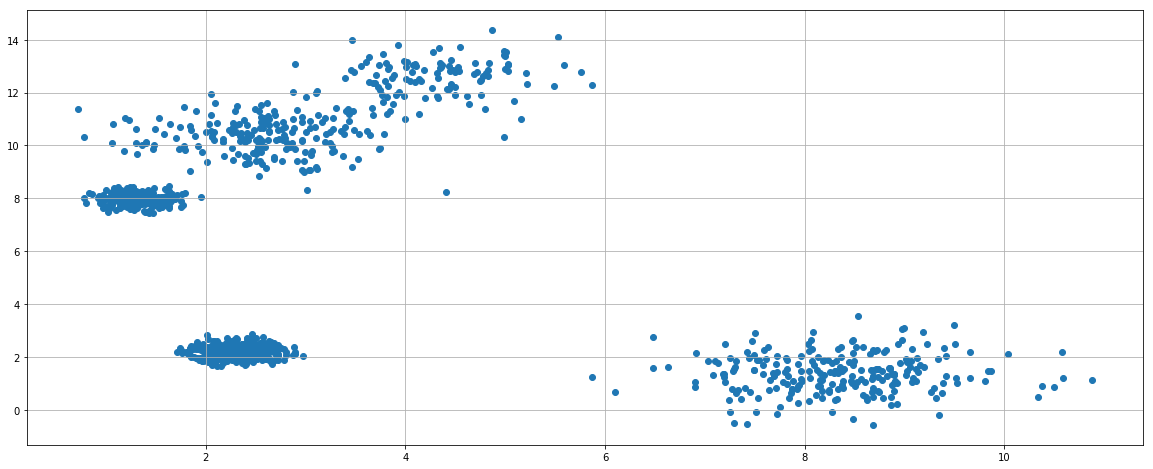

In [14]:
kmeans_data = Data(data, column_defs)
x_vals, y_vals = kmeans_data.kmeans_data_for_viz()

#x_vals = [r["location_x"] for r in kmeans_data]
#y_vals = [r["location_y"] for r in kmeans_data]

fig = scatter_plot(x_vals, y_vals)
plt.show()

In [15]:
class KMeans:
    def __init__(self, k, num_iterations=200, tolerance=0.00001):
        self.k = k
        self.num_iterations = num_iterations
        self.tolerance = 0.00001
        # data: [(x1, y1), (x2, y2)]
        # centers: [(center1_x, center1_y), ...]
        # labels label_1, label_2, ...]
        # where label_i = {0..(k-1)}
    
    def fit(self, data):
        centers = self._initialize_centers(data)
        
        for i in range(self.num_iterations):
            # assign labels
            labels = self._assign_labels(data, centers)
            
            # calculate new cluster centers
            new_centers = self._calculate_cluster_centers(data, labels)
            
            # check if we need to break the loop
            center_diffs = []
            for cluster_id in range(self.k):
                distance_diff = self._distance_between(new_centers[cluster_id], centers[cluster_id])
                center_diffs.append(distance_diff <= self.tolerance)
            
            if all(center_diffs):
                break
                
            centers = new_centers
                
        return centers, labels
    
    def _initialize_centers(self, data):
        random_point_idx = random.sample(range(len(data)), self.k)
        centers = [data[idx] for idx in random_point_idx]
        return centers
        # return [(center1_x, center1_y), (...)]
        
    def _assign_labels(self, data, centers):
        labels = []
        for data_point in data:
            distances_to_clusters = []
            for center_point in centers:
                distance = self._distance_between(data_point, center_point)
                distances_to_clusters.append(distance)
                
            nearest_distance, label = min([(val, idx) for idx, val in enumerate(distances_to_clusters)])
            labels.append(label)
        
        # somewhere, self.distance_between()
        # return [label_1, label_2, ...]
        return labels
        
    def _distance_between(self, point1, point2):
        squared_diff_sum = (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2
        return squared_diff_sum**0.5
    
        # point: (point_x, point_y)
        # return [label_1, label_2, ...]
        
    def _mean(self, points):
        num_dimensions = 2
        sums = [0] * num_dimensions
        for point in points:
            for dim in range(num_dimensions):
                sums[dim] += point[dim]
        return tuple([s / len(points) for s in sums])
        
        # points: [(x1, y1), (x2, y2), ...]
        # return means (mean_x, mean_y)
        
    def _calculate_cluster_centers(self, data, labels):
        cluster_points = {}
        
        for idx, label in enumerate(labels) :
            if label not in cluster_points:
                cluster_points[label] = []
                
            cluster_points[label].append(data[idx])
        
        centers = []
        for cluster_id, points in cluster_points.items():
            center = self._mean(points)
            centers.append(center)
        # return centers [(center1_x, center1_y)]
        return centers
        

In [18]:
data_for_kmeans = list(zip(x_vals, y_vals))
kmeans = KMeans(2)
centers, labels = kmeans.fit(data_for_kmeans)

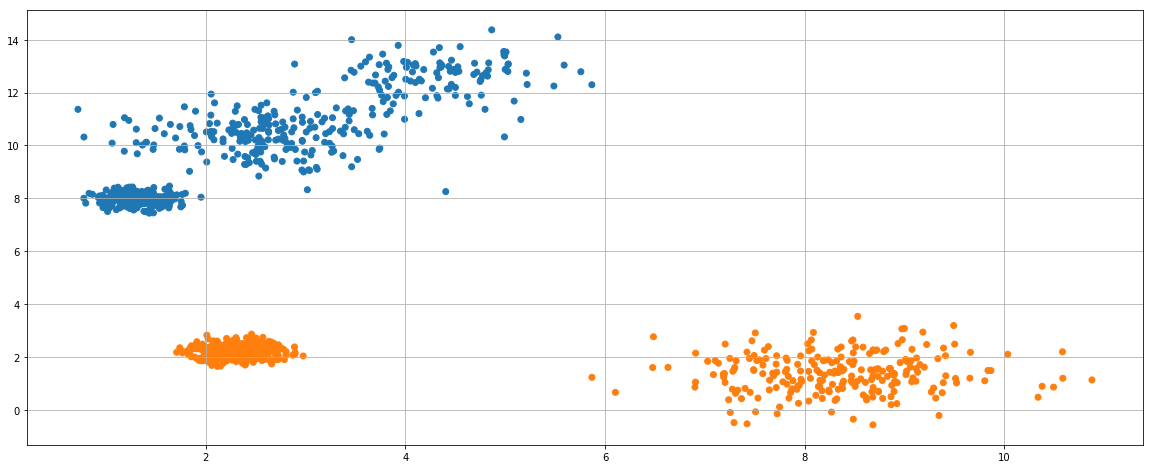

In [19]:
colors = {0: "tab:blue", 1: "tab:orange"}
label_colors = [colors[label] for label in labels]
fig = scatter_plot(x_vals, y_vals, label_colors)
plt.show()

In [56]:
def finder_k(Kmeans, kmeans, data_for_kmeans):
    #새로운 center point를 찾아 클러스터링 centroid 변하지 않을 때까지 반복
    #올바른 k를 만드는 방법: centroid에서의 거리의 평균을 구해 더 이상 작아지지 않는 지점 찾음
    find_k = 2
    kmeans = Kmeans(find_k)
    prev_centers, prev_labels = kmeans.fit(data_for_kmeans)
    new_centers = []
    labels = []
    
    while prev_centers != new_centers:
        kmeans = Kmeans(find_k)
        new_centers, labels = kmeans.fit(data_for_kmeans)
        find_k += 1
        if find_k == len(data_for_kmeans): 
            break;
    return find_k 

In [59]:
finder_k(class Kmeans, kmeans, data_for_kmeans)
colors = {0: "tab:blue", 1: "tab:orange", 2: "tab:green", 3: "tab_red"}
label_colors = [colors[label] for label in labels]
fig = scatter_plot(x_vals, y_vals, label_colors)
plt.show()

SyntaxError: invalid syntax (<ipython-input-59-839f809157ba>, line 1)